![](https://i.imgur.com/JsMvGnP.png)


## Exercício de análise exploratória de dados

Neste projeto você irá realizar uma análise estatística exploratória de um dos datasets mais famosos da comunidade de Data Science: o dataset **Titanic**.\
Essa base contém dados de 891 passageiros do Titanic. A análise vai ser guiada pelas perguntas apresentadas no decorrer do notebook.\
Todo o projeto deve ser executado neste Jupyter Notebook. Por fim, se desejar, revise as respostas com o seu mentor.

### Descrição dos dados

O dataset possui 891 registros (linhas) e 12 atributos (colunas).

Abaixo estão as descrições das colunas do nosso Dataset:

* passengerid = ID do passageiro do navio (código primário).
* survived = Se o passageiro sobreviveu ao naufrágio estará como 1, caso contrário estará com 0.
* pclass = Tipo de classe de passagem (do 1 ao 3), sendo 1 a melhor classe.
* name = Nome do passageiro.
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.

#### Carregando os dados

In [1]:
import pandas as pd
import numpy as np
# Carregando os dados
# O arquivo “titanic.csv” deve estar salvo na mesma pasta do seu código Python
df = pd.read_csv("titanic.csv")

# Exibe o número de linhas e colunas
print(df.shape)

# Exibe as 10 primeiras linhas
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1. Qual foi a proporção de passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro _normalize_

In [2]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### 2. Qual era a faixa etária dos passageiros que estavam no Titanic?

In [3]:
minima = df["Age"].min()
maxima = df["Age"].max()
print(f"De {minima} a {maxima}")

De 0.42 a 80.0


#### 3. Qual porcentagem de homens e mulheres sobreviventes? 

In [4]:
df.loc[df["Survived"]==1, "Sex"].value_counts(normalize=True)

female    0.681287
male      0.318713
Name: Sex, dtype: float64

In [6]:
df.groupby(["Sex", "Survived"]).count()["PassengerId"]/df.groupby(["Sex"]).count()["PassengerId"]

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: PassengerId, dtype: float64

#### 4. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

[Dica ...](http://professorguru.com.br/estatistica/introdu%C3%A7%C3%A3o%20%C3%A0%20estat%C3%ADstica/tipos%20de%20vari%C3%A1veis%20estat%C3%ADsticas.html)

In [7]:
df[['Survived','Pclass','Name','Sex','Age']].dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
dtype: object

#### 5. Qual o tipo de classe de passagem mais frequente nos dados?

In [9]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 6. Qual a média e desvio padrão do valor das passagens? ***

In [10]:
media = df["Fare"].mean()
desvio_p = np.std(df["Fare"])
print(f"Média: {media}\nDesvio Padrão: {desvio_p}")

Média: 32.2042079685746
Desvio Padrão: 49.66553444477411


In [11]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### 7. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo. ***

In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:>

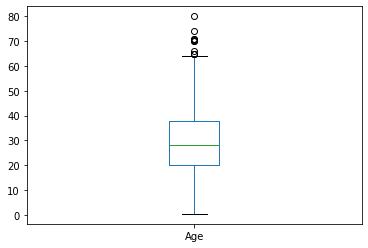

In [14]:
df["Age"].plot(kind="box")

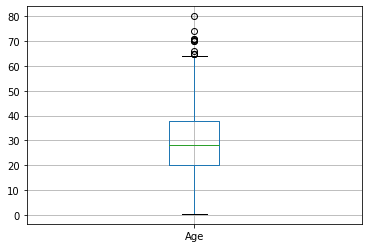

#### 8. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?****


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

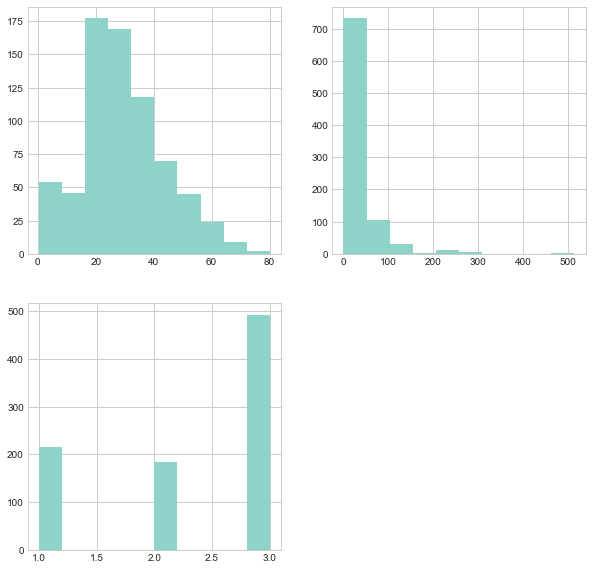

In [42]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
plt.hist(df["Age"])     
fig.add_subplot(2,2,2)
plt.hist(df["Fare"])
fig.add_subplot(2,2,3)
plt.hist(df["Pclass"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce18650>,
      dtype=object)

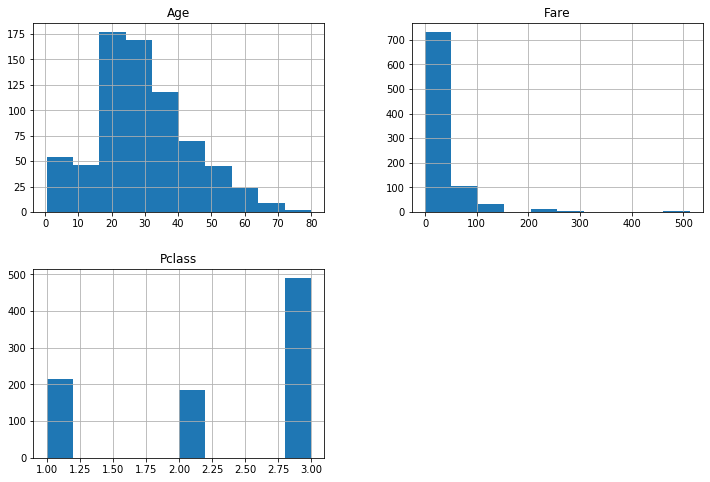

Ótimo trabalho!